In [1]:
import pyjack
import numpy

In [2]:
numpy.random.seed(42)

my_data = numpy.random.randn(100,10)*0.3+4

obs = pyjack.observable(description='My Observable')
obs.create(my_data)
print(obs)

pyjack(4.001(26), 4.001(31), 3.985(30), 4.033(30), 4.024(31), 3.990(29), 3.986(28), 4.011(27), 4.009(27), 4.017(30), description=My Observable)


In [3]:
# Arithmetic operations casted for observables

squared = obs ** 2
exponential = pyjack.exp(obs)
summed = obs @ numpy.ones(my_data.shape[1])

print(squared)
print(exponential)
print(summed)

pyjack(16.01(21), 16.01(25), 15.88(24), 16.26(24), 16.19(25), 15.92(23), 15.89(22), 16.09(21), 16.07(22), 16.14(24), description=My Observable)
pyjack(54.7(14), 54.6(17), 53.8(16), 56.4(17), 55.9(17), 54.1(15), 53.8(15), 55.2(14), 55.1(15), 55.6(17), description=My Observable)
pyjack(40.058(94), description=My Observable)


[jackfit.fit] Fit did converge: [LevenbergMarquardt.minimize] Convergence with tolerance 1e-08 reached after 10 iterations. Exiting successfully
[jackfit.fit] chi2obs = 7.836280954852426
[jackfit.fit] chi2exp = 7.815914787314762 +- 1.105337269457296
[jackfit.fit] p-value = 0.4395 +- 0.004963510717613531
pyjack(4.009(17), 0.0032(36), description=Best parameters of fit)


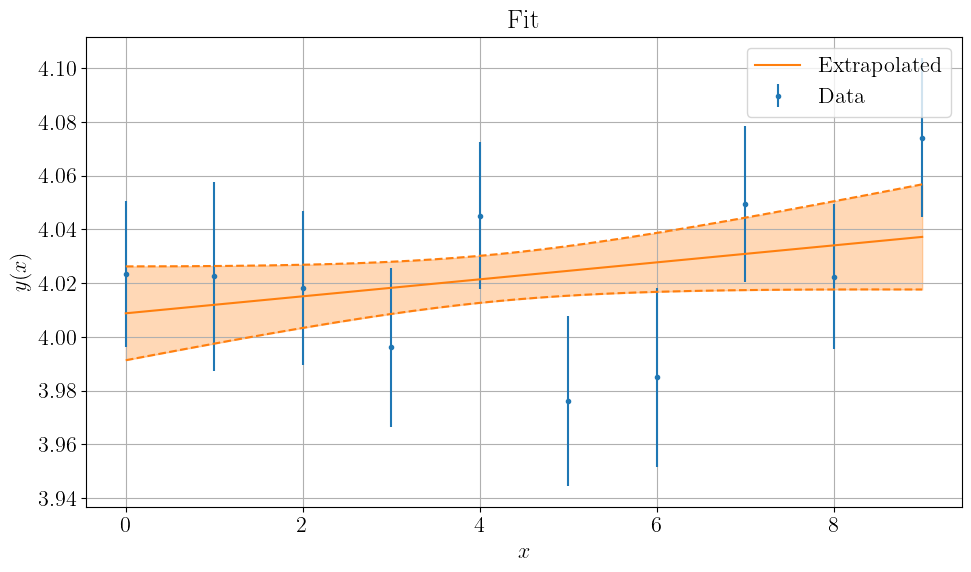

In [4]:
# Possibility to perform fits

import matplotlib.pyplot as plt
data = numpy.random.randn(100,10)*0.3+4
obs = pyjack.observable()
obs.create(data)
fitfunc = 'params0+params1*x'
initial_guess = [3,0]
W = 'diag'
fit1 = pyjack.jackfit(fitfunc,W,initial_guess)
fit1.fit(numpy.arange(obs.data.shape[1]),obs,max_iter=1000,tol=1e-8,num_samples=10000)
print(fit1.params)
fit1.plot()

[jackfit.fit] Fit did converge: [LevenbergMarquardt.minimize] Convergence with tolerance 1e-08 reached after 2 iterations. Exiting successfully
[jackfit.fit] chi2obs = 13.737578528546557
[jackfit.fit] chi2exp = 7.931180797576047 +- 0.338186685517815
[jackfit.fit] p-value = 0.0848 +- 0.002785977775793756
pyjack(4.0059(54), -0.0013(10), description=Best parameters of fit)


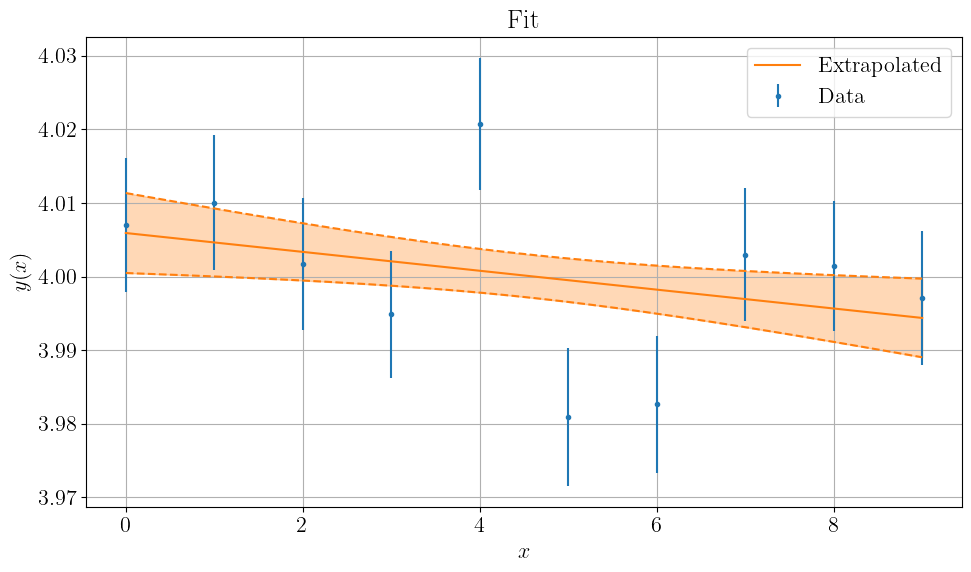

In [5]:
# Increase statistics

new_data = numpy.random.randn(1000,10)*0.3+4

obs.increase_statistics(new_data)

fit1 = pyjack.jackfit(fitfunc,W,initial_guess)
fit1.fit(numpy.arange(obs.data.shape[1]),obs,max_iter=1000,tol=1e-8,num_samples=10000)
print(fit1.params)
fit1.plot()



In [6]:
# Do operations directly on observables

pyjack.mean(obs,axis=0)

pyjack(4.000(34), description=None)

In [7]:
obs

pyjack(4.0070(90), 4.0100(91), 4.0017(89), 3.9949(86), 4.0207(89), 3.9809(93), 3.9827(93), 4.0030(90), 4.0014(87), 3.9971(91), description=None)

In [10]:
pyjack.roll(obs,axis=1,shift=-2)

pyjack(4.0017(89), 3.9949(86), 4.0207(89), 3.9809(93), 3.9827(93), 4.0030(90), 4.0014(87), 3.9971(91), 4.0070(90), 4.0100(91), description=None)